In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from gmdh import Combi, Mia

In [4]:
# 1. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞
print("1) –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö...")
df = pd.read_csv('dataset/housing_price_dataset.csv')
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)
X = df.drop(columns=['Price'])
y = df['Price']

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö (48,000 –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, ~2,000 –¥–ª—è —Ç–µ—Å—Ç–∞)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, train_size=0.96, random_state=42
)
print(f" ‚Üí Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è GMDH (–Ω–µ–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–ª—è —Å–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç–∏)
X_train_gmdh, X_test_gmdh, y_train_gmdh, y_test_gmdh = train_test_split(
    X, y, train_size=0.96, random_state=42
)
X_train_np = X_train_gmdh.to_numpy(dtype=float)
X_test_np = X_test_gmdh.to_numpy(dtype=float)
y_train_np = y_train_gmdh.to_numpy(dtype=float).ravel()
y_test_np = y_test_gmdh.to_numpy(dtype=float).ravel()


1) –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö...
 ‚Üí Train shape: (48000, 6), Test shape: (2000, 6)


In [5]:
# 2. Stacking
print("\n2) –û–±—É—á–µ–Ω–∏–µ StackingRegressor...")
stack_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42))
    ],
    final_estimator=LinearRegression()
)
stack_model.fit(X_train, y_train)
print(" ‚úÖ Stacking trained")


2) –û–±—É—á–µ–Ω–∏–µ StackingRegressor...
 ‚úÖ Stacking trained


In [6]:
# 3. MLP
print("\n3) –û–±—É—á–µ–Ω–∏–µ MLPRegressor...")
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
print(" ‚úÖ MLP trained")


3) –û–±—É—á–µ–Ω–∏–µ MLPRegressor...
 ‚úÖ MLP trained


In [7]:
# 4. GMDH –Ω–∞ –ø–æ–ª–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
print("\n4) –û–±—É—á–µ–Ω–∏–µ GMDH –Ω–∞ –ø–æ–ª–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ...")
try:
    gmdh_linear = Combi()
    gmdh_linear.fit(X_train_np, y_train_np)
    print(" ‚úÖ GMDH Linear (Combi) trained")
except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –≤ GMDH Linear (Combi): {e}")
    gmdh_linear = None

try:
    gmdh_nonlinear = Mia()
    gmdh_nonlinear.fit(X_train_np, y_train_np)
    print(" ‚úÖ GMDH Nonlinear (Mia) trained")
except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –≤ GMDH Nonlinear (Mia): {e}")
    gmdh_nonlinear = None


4) –û–±—É—á–µ–Ω–∏–µ GMDH –Ω–∞ –ø–æ–ª–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ...
 ‚úÖ GMDH Linear (Combi) trained
 ‚úÖ GMDH Nonlinear (Mia) trained


In [8]:
# 5. –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞
print("\n5) –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π:")
models = {
    'Stacking': (stack_model, X_test, y_test),
    'MLP': (mlp_model, X_test, y_test),
    'GMDH-Linear': (gmdh_linear, X_test_np, y_test_np),
    'GMDH-Nonlinear': (gmdh_nonlinear, X_test_np, y_test_np)
}

results = []
for name, (model, X_eval, y_eval) in models.items():
    if model is None:
        print(f" ‚Ä¢ {name}: –ü—Ä–æ–ø—É—â–µ–Ω –∏–∑-–∑–∞ –æ—à–∏–±–∫–∏")
        results.append({'Model': name, 'MAE': np.nan, 'R2': np.nan})
        continue
    y_pred = model.predict(X_eval)
    mae = mean_absolute_error(y_eval, y_pred)
    r2 = r2_score(y_eval, y_pred)
    results.append({'Model': name, 'MAE': mae, 'R2': r2})
    print(f" ‚Ä¢ {name}: MAE = {mae:.2f}, R¬≤ = {r2:.4f}")


5) –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π:
 ‚Ä¢ Stacking: MAE = 39656.58, R¬≤ = 0.5872
 ‚Ä¢ MLP: MAE = 39772.36, R¬≤ = 0.5867
 ‚Ä¢ GMDH-Linear: MAE = 39704.93, R¬≤ = 0.5874
 ‚Ä¢ GMDH-Nonlinear: MAE = 39691.25, R¬≤ = 0.5873



6) –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤...


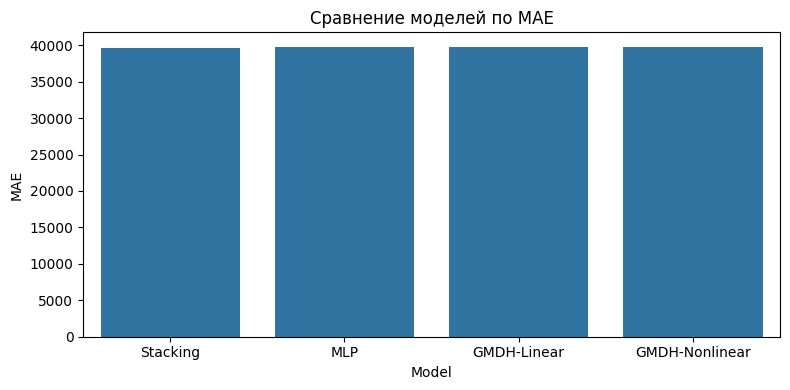

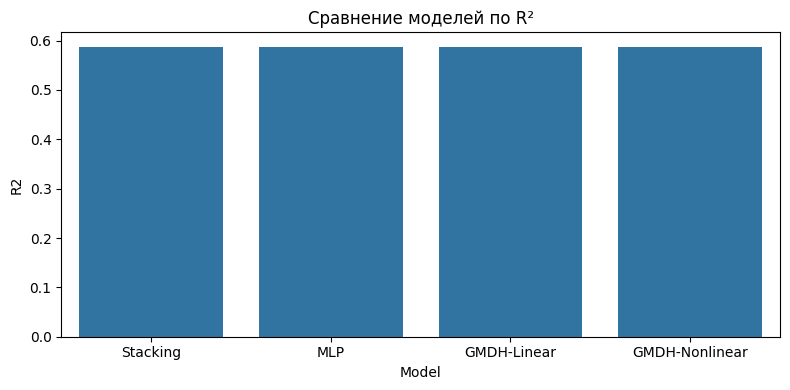

In [10]:
# 6. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
print("\n6) –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤...")
res_df = pd.DataFrame(results)

# –ì—Ä–∞—Ñ–∏–∫ MAE
plt.figure(figsize=(8, 4))
sns.barplot(data=res_df, x='Model', y='MAE')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ MAE')
plt.tight_layout()
plt.show()

# –ì—Ä–∞—Ñ–∏–∫ R¬≤
plt.figure(figsize=(8, 4))
sns.barplot(data=res_df, x='Model', y='R2')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ R¬≤')
plt.tight_layout()
plt.show()


7) –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (–ø–æ—Å–ª–µ–¥–Ω–∏–µ 100 –¥–æ–º–æ–≤):


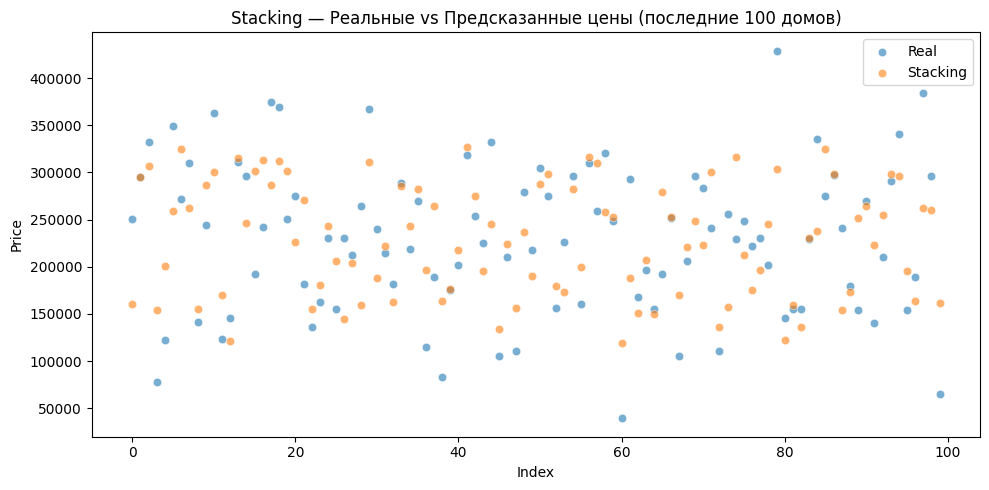

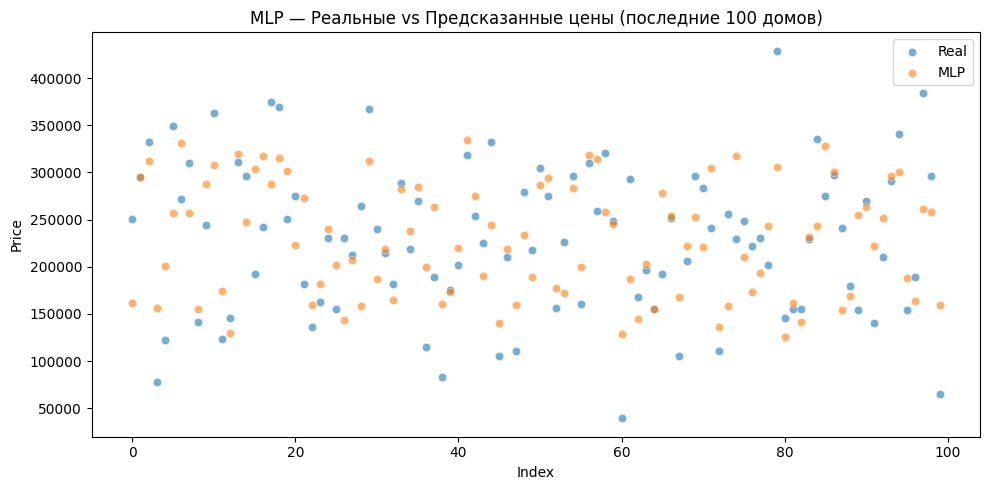

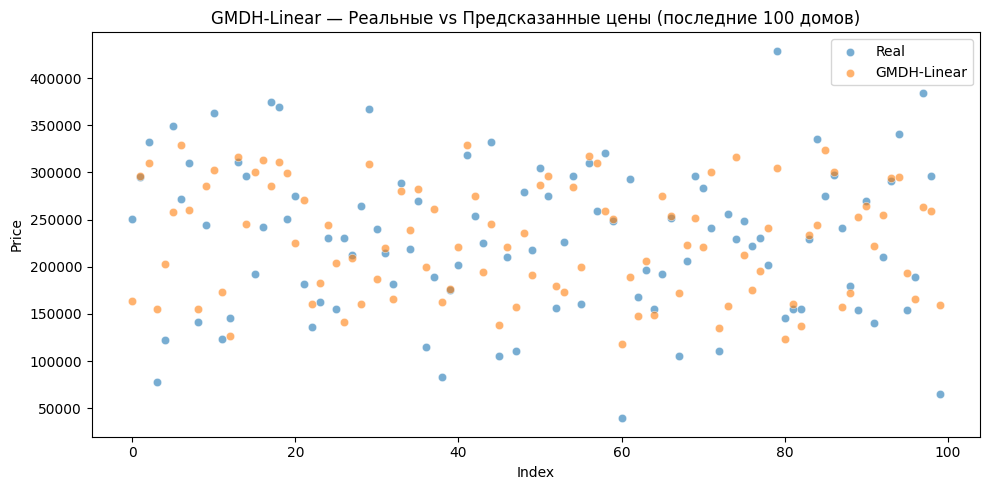

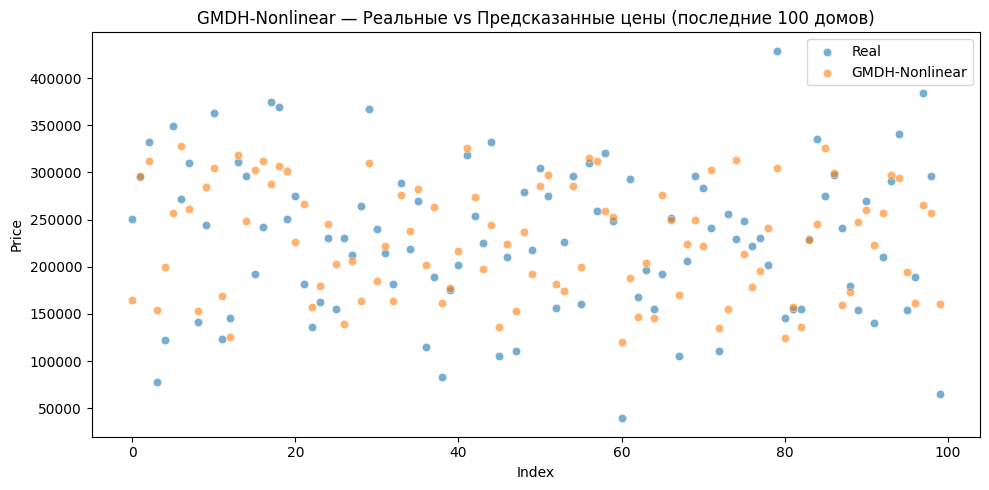


üéâ –°–∫—Ä–∏–ø—Ç –≤—ã–ø–æ–ª–Ω–µ–Ω —É—Å–ø–µ—à–Ω–æ!


In [11]:
# Scatter-–≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (–ø–æ—Å–ª–µ–¥–Ω–∏–µ 100 –¥–æ–º–æ–≤)
print("\n7) –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (–ø–æ—Å–ª–µ–¥–Ω–∏–µ 100 –¥–æ–º–æ–≤):")
for name, (model, X_eval, y_eval) in models.items():
    if model is None:
        print(f" ‚Ä¢ {name}: –ü—Ä–æ–ø—É—â–µ–Ω –∏–∑-–∑–∞ –æ—à–∏–±–∫–∏")
        continue
    y_pred = model.predict(X_eval)
    # –í—ã–±–∏—Ä–∞–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–µ 100 –ø—Ä–∏–º–µ—Ä–æ–≤
    y_eval_last = y_eval[-100:]
    y_pred_last = y_pred[-100:]
    vis_df = pd.DataFrame({
        'Index': np.arange(100),
        'True': y_eval_last,
        'Pred': y_pred_last
    })
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=vis_df, x='Index', y='True', label='Real', alpha=0.6)
    sns.scatterplot(data=vis_df, x='Index', y='Pred', label=name, alpha=0.6)
    plt.title(f'{name} ‚Äî –†–µ–∞–ª—å–Ω—ã–µ vs –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ —Ü–µ–Ω—ã (–ø–æ—Å–ª–µ–¥–Ω–∏–µ 100 –¥–æ–º–æ–≤)')
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

print("\nüéâ –°–∫—Ä–∏–ø—Ç –≤—ã–ø–æ–ª–Ω–µ–Ω —É—Å–ø–µ—à–Ω–æ!")